In this notebook we create few plots of wind intensity measured by satellite, with a particular interest on the Canary Islands, which frequently generate the so-called *von Karman* vortex street.

In [15]:
import datetime
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import filament
import logging
import copy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from osgeo import gdal, osr
import logging
from importlib import reload

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Starting")

INFO:root:Starting


## Input parameters
We set the date of interest and the domain coordinates are taken from the geoTIFF file.

In [17]:
year, month, day = 2020, 1, 21
figdir = "../figures/wind/"
visibledir = "/data/Visible/Balearic/"
os.path.exists(figdir)

True

## Data

In [6]:
datewind = datetime.datetime(year, month, day)
dayofyear = datewind.timetuple().tm_yday

### Visible image

In [8]:
visibleim = datewind.strftime("VIIRS-%Y-%m-%dT00_00_00Z.tiff")
#visibleim = datewind.strftime("Sentinel-3_OLCI_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("Sentinel-2_L1C_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("Terra-%Y-%m-%dT00_00_00Z.tiff")
if os.path.exists(os.path.join(visibledir, visibleim)):
    logger.info("Reading geoTIFF file {}".format(visibleim))
    vis = filament.Visible()
    vis.read_geotiff(os.path.join(visibledir, visibleim))
    extent2 = copy.deepcopy(vis.extent)
    extent2[0] -= 360.
    extent2[1] -= 360.
else:
    extent2 = [-360.551513671875, -356.715087890625, 36.77124023437501, 40.86694335937501]
    logger.info("No visible image for that date")

INFO:root:Reading geoTIFF file VIIRS-2020-01-21T00_00_00Z.tiff


In [19]:
domain = [-0.5, 3.5, 36.5, 40.5]

### Scatterometer wind
The wind (netCDF) are read from the JPL OPEnDAP server.      
The files are sorted by years and days of year.

With these pieces of information we can create two lists of files (one for MetOp-A, one for MetOp-A).

In [10]:
filelist1 = filament.get_filelist_url(year, dayofyear)
# filelist1 = ["https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_b/coastal_opt/2019/332/ascat_20191128_092400_metopb_37332_eps_o_coa_3202_ovw.l2.nc.gz"]

INFO:Filament:Found 28 files


In [8]:
filelist = ["/data/Wind/ASCAT/ascat_20191107_203300_metopa_67727_eps_o_coa_3202_ovw.l2.nc.gz"]

INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_075400_metopa_68785_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:Subsetting data to region of interest
INFO:root:Saving figure as VIIRS-ascat_20200121_075400_metopa_68785_eps_o_coa_3202_ovw


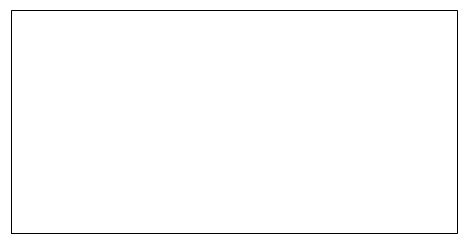

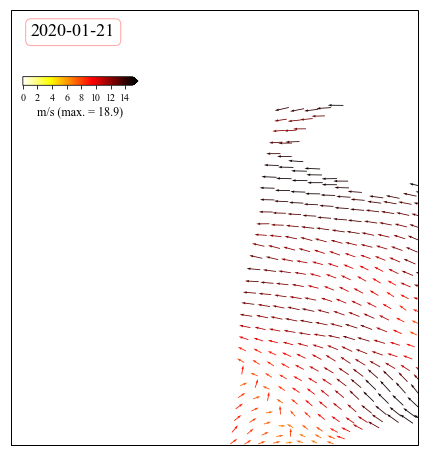

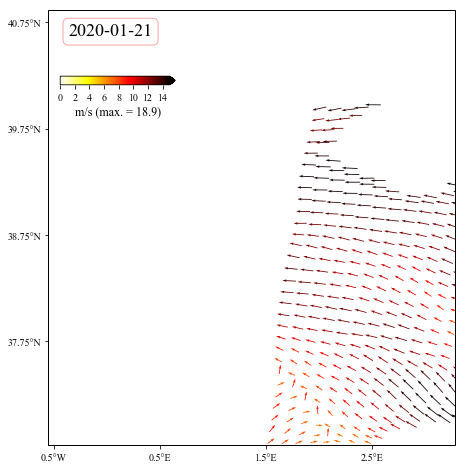

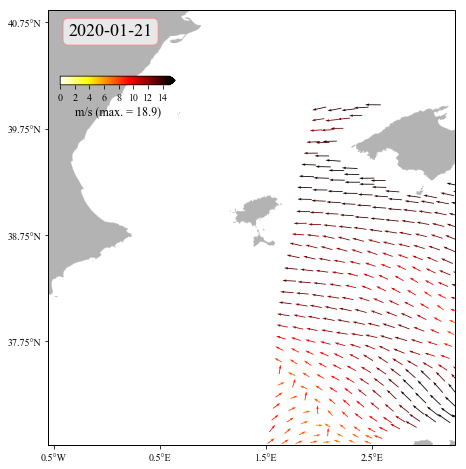

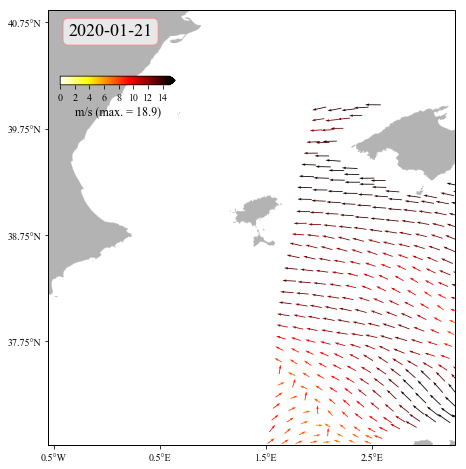

INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_093300_metopa_68786_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_111500_metopa_68787_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_125700_metopa_68788_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_143900_metopa_68789_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/p

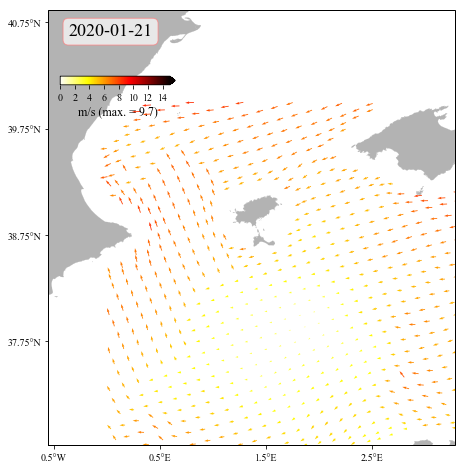

INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_212400_metopa_68793_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_230600_metopa_68794_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_b/coastal_opt/2020/021/ascat_20200121_004200_metopb_38094_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_b/coastal_opt/2020/021/ascat_20200121_022100_metopb_38095_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest
INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/p

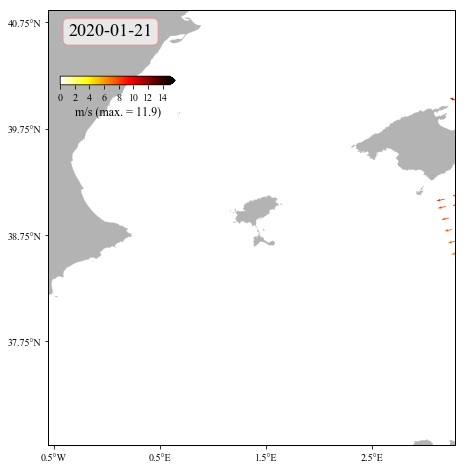

INFO:root:Working on https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_b/coastal_opt/2020/021/ascat_20200121_223900_metopb_38107_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest


In [18]:
filelistclean = []
 
for ifile, dataurl in enumerate(filelistclean)

    logger.info("Working on {}".format(dataurl))
    wind = filament.Wind()
    res = wind.read_ascat(dataurl, extent2)

    if res:    
        filelistclean.append(dataurl)
        mm = str(month).zfill(2)
        dd = str(day).zfill(2)
        
        fname = "".join(("VIIRS-", dataurl.split("/")[-1].split(".")[0]))
        logger.info("Saving figure as {}".format(fname))
        figname = os.path.join(figdir, fname)
        
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, projection=myproj)
        # vis.add_to_plot(ax, myproj)

        wind.add_to_plot(fig, ax, domain=domain,
                         cmap=plt.cm.hot_r, clim=[0, 15], 
                         date="{}-{}-{}".format(year, mm, dd))
        
        filament.decorate_map(ax, 
                                 domain, 
                                 np.arange(-0.5, 3.5, 1.0), 
                                 np.arange(36.75, 41., 1.0))
        
        ax.add_feature(coast, linewidth=.2, color=".7")
        
        plt.savefig(figname, dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()

In [20]:
filelistclean

['https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_075400_metopa_68785_eps_o_coa_3202_ovw.l2.nc.gz',
 'https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_a/coastal_opt/2020/021/ascat_20200121_194200_metopa_68792_eps_o_coa_3202_ovw.l2.nc.gz',
 'https://opendap.jpl.nasa.gov:443/opendap/OceanWinds/ascat/preview/L2/metop_b/coastal_opt/2020/021/ascat_20200121_205700_metopb_38106_eps_o_coa_3202_ovw.l2.nc.gz']